<h3>Training a DecisionTreeClassifier on bootstraped samples of the pima indians dataset</h3>

In [18]:
# Import Dependencies
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [2]:
# load dataset
data = pd.read_csv("C:\\Users\\Srivatsa\\Desktop\\Great_Lakes\\Datasets\\pima-indians-diabetes.csv")

In [3]:
data.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.shape

(768, 9)

In [6]:
data.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [11]:
# Function to resample dataset according to specified sample and classify dataset using Decision Tree
# Configure Bootstrap: # n_iterations = 10 => number of bootstrap samples is 10
def dtree_classifier_bootstrap(n_iterations, confidence):
    # this is a numpy array of the dataset
    values = data.values
    # list to store the scores
    stats = []

    for i in range(n_iterations):
    #   1. prepare the train and test sets
    #   Sampling with replacement
        train = resample(values)
        X_train = train[:,:-1]
        y_train = train[:,-1]
        test = np.array([x for x in values if x.tolist() not in train.tolist()])
        X_test = test[:,:-1]
        y_test = test[:,-1]
    #     2. fit model
        model = DecisionTreeClassifier(max_depth = 4)
    #     3. Evaluate Model
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        score = accuracy_score(y_test, pred)
        stats.append(score)
    #     4. Plot the histogram
    plt.hist(stats)
    plt.show()
    #     5. Confidence Interval
    p = ((1.0-confidence)/2.0)*100
    lower = max(0.0, np.percentile(stats, p))
    p = (confidence+((1.0-confidence)/2.0))*100
    upper = min(0.0, np.percentile(stats, p))
    print(f"{confidence*100}% confidence interval; Score range: {lower*100} --> {upper*100}")

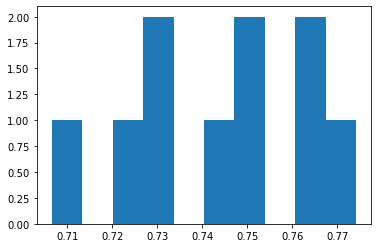

95.0% confidence interval; Score range: 70.97451605469351 --> 0.0


In [13]:
# 1. for 10 iterations
dtree_classifier_bootstrap(n_iterations=10, confidence=0.95)

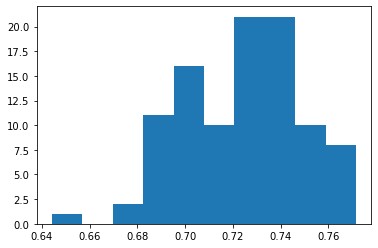

95.0% confidence interval; Score range: 68.06301299589603 --> 0.0


In [14]:
# 1. for 100 iterations
dtree_classifier_bootstrap(n_iterations=100, confidence=0.95)

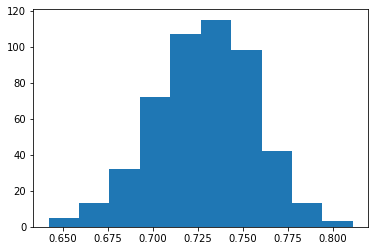

95.0% confidence interval; Score range: 66.90376940133038 --> 0.0


In [15]:
# 1. for 500 iterations
dtree_classifier_bootstrap(n_iterations=500, confidence=0.95)

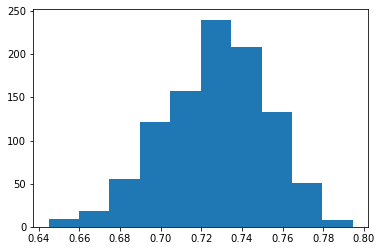

95.0% confidence interval; Score range: 67.47966507177033 --> 0.0


In [17]:
# 1. for 1000 iterations
dtree_classifier_bootstrap(n_iterations=1000, confidence=0.95)

<b>As we increase the n_iterations, we get closer to a normal distribution. This is because of the central limit theoram</b>